In [198]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
tf.reset_default_graph()

In [199]:
from tensorflow.examples.tutorials.mnist import input_data
mnist= input_data.read_data_sets('MNIST_data',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [200]:
# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1


In [201]:
# Network Parameters
n_hidden_1 = 1000 # 1st layer num features
n_hidden_2 = 1000 # 2nd layer num features
n_hidden_3 = 500  # 3rd layer num features
n_hidden_4 = 200  # 4th layer num features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

In [202]:
# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [203]:
# Create model
import numpy  as np
def multilayer_perceptron(_X, _weights):
    #Hidden layer with RELU activation
    layer_1 = tf.nn.relu(tf.matmul(_X, _weights['h1'])) 
    #Hidden layer with RELU activation
    layer_2  = tf.nn.relu(tf.matmul(layer_1, _weights['h2']))
    #Hidden layer with RELU activation
    layer_3 = tf.nn.relu(tf.matmul(layer_2, _weights['h3']))
    #Hidden layer with RELU activation
    layer_4 = tf.nn.relu(tf.matmul(layer_3, _weights['h4']))
    return tf.matmul(layer_4, weights['out'])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.random_normal([n_hidden_4, n_classes]))
}


In [213]:
def pruner2part1(weights):
    weightsp1=np.array(weights['h1'].eval())
    weightsp2=np.array(weights['h2'].eval())
    weightsp3=np.array(weights['h3'].eval())
    weightsp4=np.array(weights['h4'].eval())
    
    def sub(weightsp,row,column):
        checkpoints=[0, 25, 50, 60, 70, 80, 90, 95, 97, 99]
        c=[]
        d=[]
        
        count=0
        total=0
        weightsq=np.dot(np.array(weightsp),np.array(weightsp).transpose())
        wess=[]
        for i in range(row):
            for j in range(column):
                if(i==j):
                    wess.append(weightsq[i][j])
#                         print(weightsq[i][j])
        wess.sort()
        print(type(wess))
        print(len(wess))
        for l in checkpoints:
            a=np.round((l/100)*len(wess)).astype(int)
            for i in range(a,a+1):
                c.append(wess[i])
            d.append(l)
        return(c,d)
    
    k1,perc1 = sub(weightsp1,n_input,n_hidden_1)
    k2,perc2 = sub(weightsp2,n_hidden_1,n_hidden_2)
    k3,perc3 = sub(weightsp3,n_hidden_2,n_hidden_3)
    k4,perc4 = sub(weightsp4,n_hidden_3,n_hidden_4)
    return (k1,k2,k3,k4,perc1,perc2,perc3,perc4)

In [216]:
 def sub(weightsp,k,row,column):
    count=0
    total=0
    weightsq=np.dot(np.array(weightsp),np.array(weightsp).transpose())
    for i in range(row):
        for j in range(column):
            if (i==j):
                if(np.absolute(weightsq[i][j])<np.round(k,4)):
                    weightsp[:,j]=0
    return(weightsp)
    
def pruner2part2(k1,k2,k3,k4,weights):
    weightsp1=np.array(weights['h1'].eval())
    weightsp2=np.array(weights['h2'].eval())
    weightsp3=np.array(weights['h3'].eval())
    weightsp4=np.array(weights['h4'].eval())
    weightsupreme1=[]
    weightsupreme2=[]
    weightsupreme3=[]
    weightsupreme4=[]
    for m in k1:
        weightsupreme1.append(sub(np.array(weightsp1),m,n_input,n_hidden_1))
    for m in k2:
        weightsupreme2.append(sub(np.array(weightsp2),m,n_hidden_1,n_hidden_2))
    for m in k3:
        weightsupreme3.append(sub(np.array(weightsp3),m,n_hidden_2,n_hidden_3))
    for m in k4:
        weightsupreme4.append(sub(np.array(weightsp4),m,n_hidden_3,n_hidden_4))
    return(weightsupreme1,weightsupreme2,weightsupreme3,weightsupreme4)

def pruner2part3(x,w1,w2,w3,w4,weights):
    #Hidden layer with RELU activation
    layer_1 = tf.nn.relu(tf.matmul(x,w1))
    #Hidden layer with RELU activation
    layer_2  = tf.nn.relu(tf.matmul(layer_1,w2))
    #Hidden layer with RELU activation
    layer_3 = tf.nn.relu(tf.matmul(layer_2,w3))
    #Hidden layer with RELU activation
    layer_4 = tf.nn.relu(tf.matmul(layer_3,w4))
    return tf.matmul(layer_4, weights['out'])
    

Epoch: 0001 cost= 36158.758307440
Epoch: 0002 cost= 6720.362765725
Epoch: 0003 cost= 2895.032691148
Epoch: 0004 cost= 1277.292983210
Epoch: 0005 cost= 693.816917525
Epoch: 0006 cost= 357.616561844
Epoch: 0007 cost= 246.034954104
Epoch: 0008 cost= 224.230458902
Epoch: 0009 cost= 155.432503301
Epoch: 0010 cost= 168.885167377
Epoch: 0011 cost= 145.233667122
Epoch: 0012 cost= 123.496768869
Epoch: 0013 cost= 84.350841188
Epoch: 0014 cost= 81.319436877
Epoch: 0015 cost= 80.653316722
Optimization Finished!
<class 'list'>
784
<class 'list'>
1000
<class 'list'>
500
<class 'list'>
200
[878.5578, 973.329, 1002.5409, 1012.7346, 1023.9597, 1039.9825, 1059.1954, 1075.8711, 1087.604, 1109.6134] [880.0915, 972.2444, 1000.90656, 1013.2925, 1025.9607, 1040.706, 1062.4083, 1079.0123, 1089.2269, 1108.7295] [382.82495, 482.43448, 501.8055, 510.87262, 518.9234, 530.0069, 543.9291, 556.3927, 564.4149, 582.989] [155.01337, 185.05374, 196.96358, 200.24086, 205.07942, 212.30487, 224.10542, 229.37582, 236.3115, 

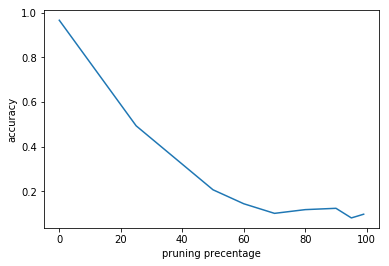

Accuracy for 0% pruning 0.9663


In [217]:
# Define loss and optimizer
# Softmax loss
pred = multilayer_perceptron(x, weights)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y)) 
# Adam Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
init = tf.global_variables_initializer()


# saver = tf.train.Saver()
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
            # Compute average loss
            avg_cost += sess.run(cost, feed_dict={x: batch_xs, y: batch_ys})/total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print ("Optimization Finished!")

    # Test model
#     correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    k1,k2,k3,k4,perc1,perc2,perc3,perc4=pruner2part1(weights)
    print(k1,k2,k3,k4)
    w1,w2,w3,w4=pruner2part2(k1,k2,k3,k4,weights)
#     print(w1,w2,w3,w4)
    checkpts=[0, 25, 50, 60, 70, 80, 90, 95, 97, 99]
    accu=[]
    for r in range(10):
        correct_prediction = tf.equal(tf.argmax(pruner2part3(x,(w1[r]),(w2[r]),(w3[r]),(w4[r]),weights), 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        accu.append(accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
        print ("Accuracy for :",checkpts[r],"% pruning" ,accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
    plt.plot(checkpts,accu)
    plt.xlabel("pruning precentage")
    plt.ylabel("accuracy")
    plt.show()
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print ("Accuracy for 0% pruning", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))